### **Contents:** 
1. Business Problem
2. Data Understanding
3. Exploratory Data Analysis
5. Data Preprocessing
1. Modeling and Evaluation
1. Final Model Interpretation
8. Conclusion and Recommendation
7. Deployment

-----
____

### **Import Libraries**

In [820]:
# base library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# statistics
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from phik import phik_matrix

# train test split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# preprocessing
from feature_engine.encoding import RareLabelEncoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.compose import TransformedTargetRegressor

# evaluation and interpretation
import time
from sklearn import metrics
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import shap

import pickle
import warnings
warnings.filterwarnings('ignore')

## **2. Data Understanding**
---

For this project, we use a dataset that describing Portugal bank marketing campaigns results ordered by date (from May 2008 to November 2010). Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'. (source : https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)

In [821]:
# read dataset in csv
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### **Dataset Dictionary :**

| No. | Feature Name |  Description	|
| --- | --- | ---	|
| 1. | age |  client's age	|
| 2. | job |  client's job |
| 3. | marital | client's marital status |
| 4. | education | client's education |
| 5. | default |  has credit in default?	|
| 6. | housing |  has housing loan?	|
| 7. | loan | has personal loan?	|
| 8. | contact |  contact communication type	|
| 9. | day_of_week |  last contact day of the week	|
| 10. | month |  last contact month of year |
| 11. | duration |  last contact duration, in seconds |
| 12. | campaign |  number of contacts performed during this campaign and for this client |
| 13. | pdays |  number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| 14. | previous |  number of contacts performed before this campaign and for this client	|
| 15. | poutcome |  outcome of the previous marketing campaign	|
| 16. | emp.var.rate |  employment variation rate (quarterly indicator) |
| 17. | cons.price.idx |  consumer price index |
| 18. | cons.conf.idx |  consumer confidence index	|
| 19. | euribor3m |  euribor 3 month rate |
| 20. | nr.employed |  number of employees|
| 21. | y |  has the client subscribed a term deposit?	|

In [822]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are 41.188 entries in this dataset with 21 columns and no null values in all columns. In this dataset we have 3 data types, integer, float, and object, which is already represent data in each columns. 

### **2.1 Check Duplicate Data**

In [823]:
# check duplicate data

print("Total of duplicated data is", df.duplicated().sum())
pct_duplicated = (df.duplicated().sum() / len(df) * 100).round(2)
print("The percentage of duplicated data is", pct_duplicated,'%')

Total of duplicated data is 12
The percentage of duplicated data is 0.03 %


In [824]:
df[df.duplicated(keep='first')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicate data in the dataset and the percentage of duplicate data is 0.03%. Duplicate data in machine learning datasets can cause bias and overfitting because the same data points are calculated several times. Therefore we will **remove the duplicate data**.

In [825]:
# drop duplicated rows

df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

In [826]:
# check unique value in each column
pd.set_option('display.max_colwidth',None)

pd.DataFrame({
    'feature':df.columns.values,
    'n_unique':df.nunique().values,
    'unique_values':[df[i].unique() for i in df.columns]
})

,feature,n_unique,unique_values
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,4,"[married, single, divorced, unknown]"
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,3,"[no, unknown, yes]"
5,housing,3,"[no, yes, unknown]"
6,loan,3,"[no, yes, unknown]"
7,contact,2,"[telephone, cellular]"
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,5,"[mon, tue, wed, thu, fri]"


#### Notes :
1. The dataset contains 41,176 entries and 21 columns after removing 12 duplicate data.
1. All data types have suitably represent data in each columns.
2. Column renaming are recommended for better comprehension by the stackholders.
1. Column `emp.var.rate` and `cons.conf.idx` have negative value which is possible because it calculate the difference between current and previous condition.
5. This dataset has no missing values (null values) but there are data labeled 'unknown' in column `marital`, `default`, `housing`, and `loan`.

### **2.2 Column Renaming**

In [827]:
# renaming column for better comprehension
df.rename(columns={'age':'Age',
                   'job':'Job',
                   'marital':'Marital',
                   'education':'Education',
                   'default':'Credit_Default',
                   'housing':'Housing_Loan',
                   'loan':'Personal_Loan',
                   'contact':'Contact_Type',
                   'day_of_week':'LastContact_Day',
                   'month':'LastContact_Month',
                   'duration':'LastContact_Duration(s)',
                   'campaign':'Qty_Contact',
                   'pdays':'Prev_DaysPassed',
                   'previous':'Prev_QtyContact',
                   'poutcome':'Prev_Outcome',
                   'emp.var.rate':'EmpVar_Rate',
                   'cons.price.idx':'ConsPrice_Idx',
                   'cons.conf.idx':'ConsConf_Idx',
                   'euribor3m':'Euribor3M_Rate',
                   'nr.employed':'Qty_Employee',
                   'y':'Deposit',
                   },inplace=True)

In [828]:
# define variabel to store numerical column
numerical_cols = df.select_dtypes(include=['int','float64']).columns[:].tolist()
# define variabel to store categorical column
categorical_cols = df.select_dtypes(include=['object']).columns[:].tolist()

In [829]:
# capitalize all value in categorical column
df[categorical_cols] = df[categorical_cols].applymap(str.capitalize)

### **2.3 Data Descriptive Summary**

In [830]:
# descriptive statistics for numerical data
df.describe()

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [831]:
# descriptive statistics for categorical data
df.describe(include=object)

,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Nonexistent,No
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


#### Notes :
- Most clients have no previous campaign contact.
- Most bank's clients is married, with university degree, work in administration, and has no housing or personal loan.
- Majority of clients have nonexistent outcome from previous campaign and not subscribe term deposit.

## **3. Exploratory Data Analysis**
---

### **3.1 Subscribe Term Deposit Analysis (Target Analysis)**

In [832]:
# calculate client data who subscribe and not subscribe
target = df['Deposit'].value_counts()

# calculate percentage subscribe and not subscribe term deposit
percent = (target.values*100/df['Deposit'].count()).round(2)

In [833]:
target_df = pd.DataFrame({
    'Deposit':target.index,
    'Count':target.values,
    '%':percent
}).reset_index(drop=True)
target_df

,Deposit,Count,%
0,No,36537,88.73
1,Yes,4639,11.27


This dataset have : 
- 88.74% client not subscribe term deposit 
- 11.27% client subscribe term deposit

With only 11.27% of clients subscribe term deposit, there's significant room for improvement. This aligns well with our project goal of increasing the conversion rate.

### **3.2 Feature Correlation**

### Categorical Feature Correlation using Phik

In [834]:
# Phik correlation test
phik_corr = phik_matrix(df[categorical_cols])

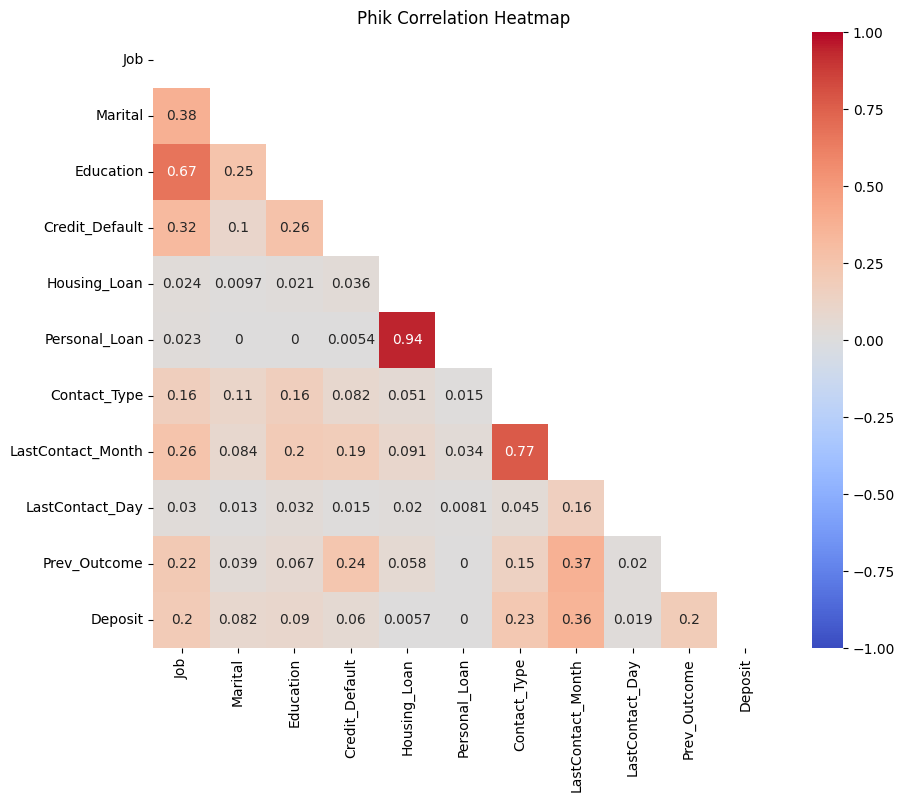

In [835]:
# create visualization using heatmap
mask = np.triu(np.ones_like(phik_corr, dtype=bool))
# mask = np.triu(phik_corr)
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm')
plt.title('Phik Correlation Heatmap')
plt.show()

There is strong positive correlation between : 
- `Personal_Loan` and `Housing_Loan` (0.94)
- `LastContact_Month` and `Contact_Type` (0.77)
- `Education` and `Job` (0.67)

The strongest correlation between categorical feature with Deposit (y) is `LastContact_Month` (0.36).

### Numerical Feature Correlation using Spearman

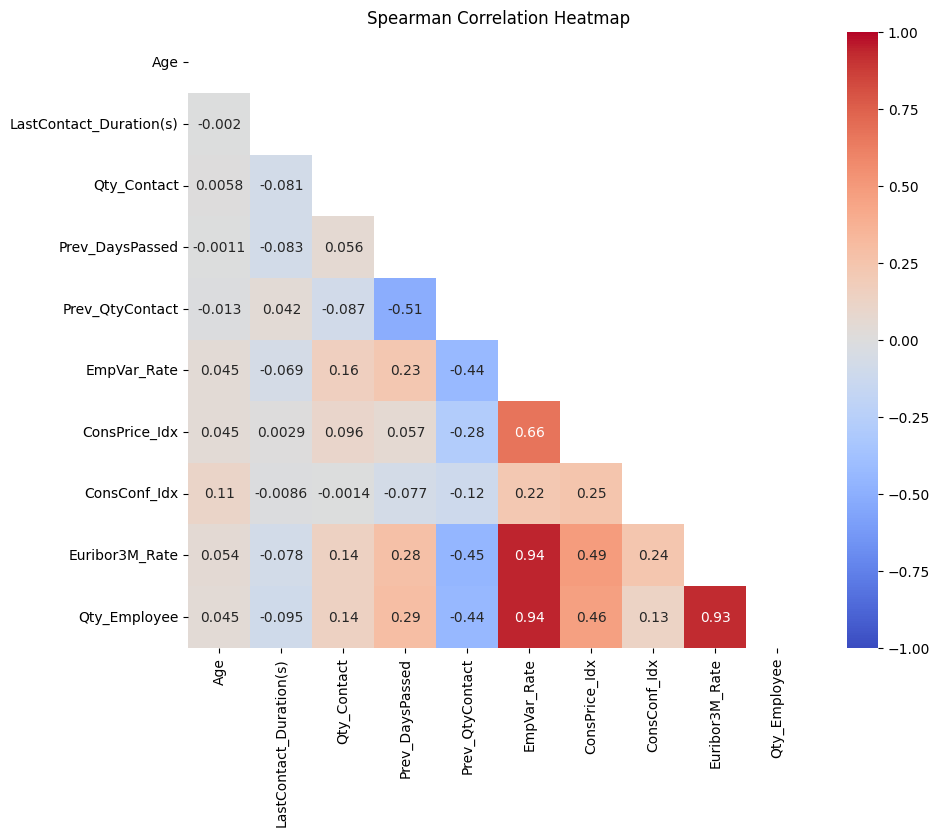

In [836]:
# Spearman correlation test
corr = df[numerical_cols].corr(method='spearman')
mask = np.triu(corr)

# create visualization using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

There are no strong correlation between each numerical features that can cause multicolinearity issue, except :
- `Euribor3M_Rate` and `EmpVar_Rate` (0.94)
- `Qty_Employee` and `EmpVar_Rate` (0.94)
- `Qty_Employee` and `Euribor3M_Rate` (0.93)

### **3.3 Categorical Features**

### Frequency of Categorical Column

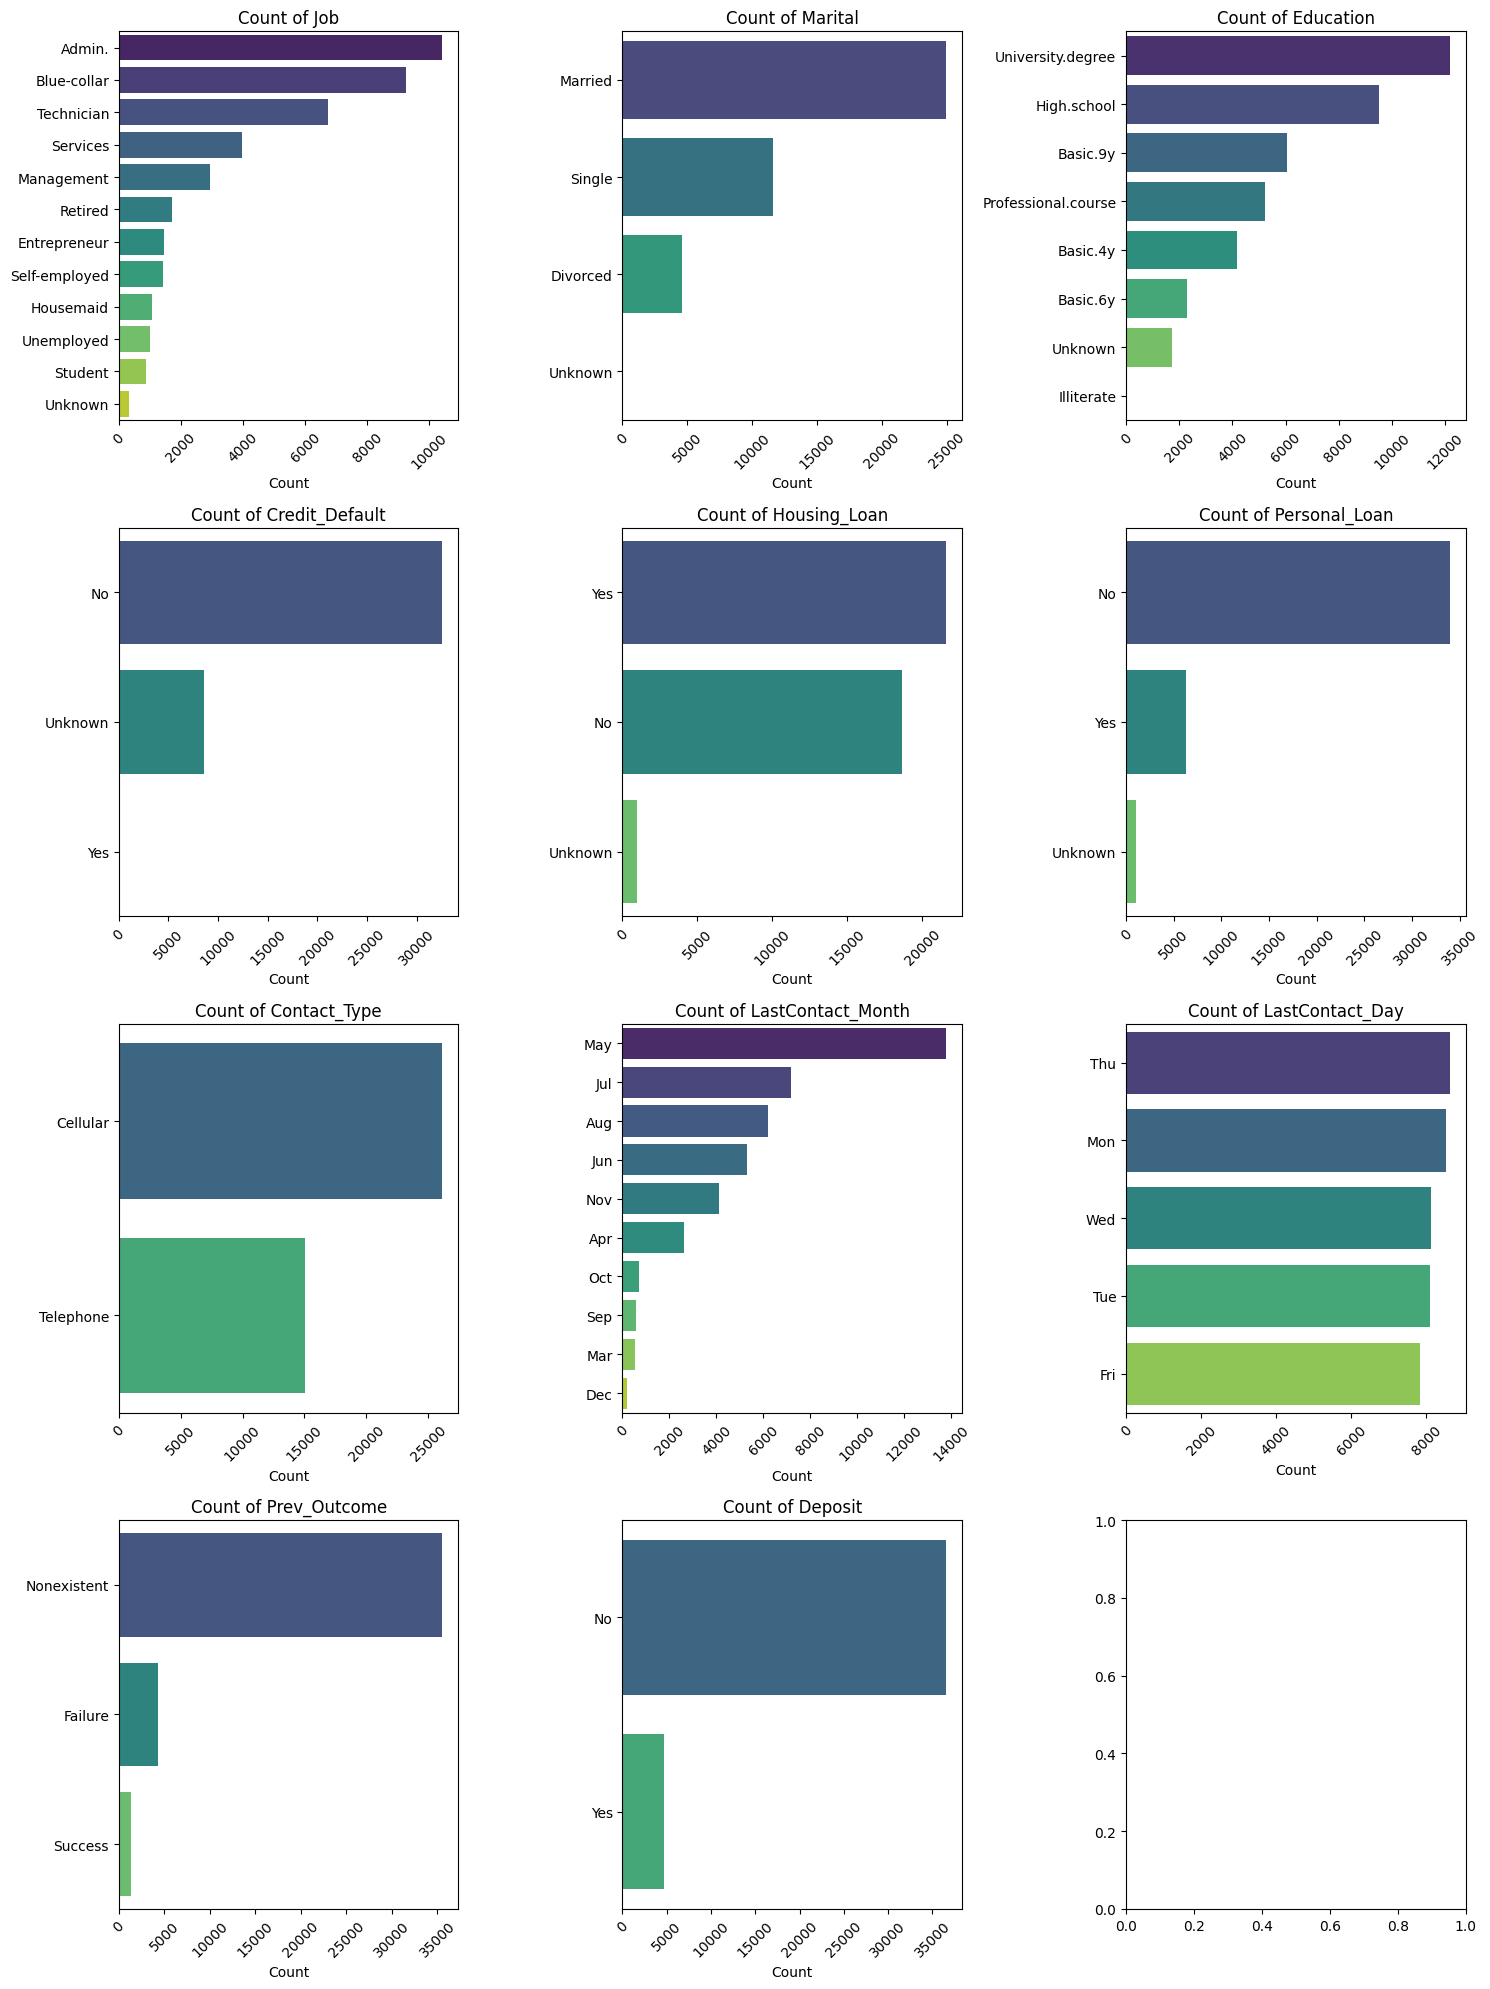

In [837]:
# create subplot
num_plots = len(categorical_cols)
num_cols = 3  # number of columns in subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # number of rows in subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# flatten axes array to easily iterate over it
axes = axes.flatten()

# create a count plot
for i, column in enumerate(categorical_cols):
    sns.countplot(data=df, y=column, palette='viridis', ax=axes[i], order=df[column].value_counts().index)
    axes[i].set_title(f'Count of {column}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

# display the plots
plt.tight_layout()
plt.show()

### Feature Job

In [838]:
# calculate data per client's job
job = df['Job'].value_counts()

# calculate data proportion
proportion = (job.values*100/df.shape[0]).round(2)

# calculate percentage per client's job resulted in subscribe and not subscribe term deposit
job_no = ((df[df['Deposit']=='No']['Job'].value_counts())*100/job).reindex(job.index).round(2)
job_yes = ((df[df['Deposit']=='Yes']['Job'].value_counts())*100/job).reindex(job.index).round(2)

In [839]:
job_df = pd.DataFrame({
    'Job':job.index,
    'Count':job.values,
    '% Proportion':proportion,
    '% Deposit No':job_no,
    '% Deposit Yes':job_yes,
}).reset_index(drop=True)
job_df

,Job,Count,% Proportion,% Deposit No,% Deposit Yes
0,Admin.,10419,25.30,87.03,12.97
1,Blue-collar,9253,22.47,93.10,6.90
2,Technician,6739,16.37,89.17,10.83
3,Services,3967,9.63,91.86,8.14
4,Management,2924,7.10,88.78,11.22
5,Retired,1718,4.17,74.74,25.26
6,Entrepreneur,1456,3.54,91.48,8.52
7,Self-employed,1421,3.45,89.51,10.49
8,Housemaid,1060,2.57,90.00,10.00
9,Unemployed,1014,2.46,85.80,14.20


In [840]:
# groupby data by 'Job' and 'Deposit'
job_analysis = df.groupby(by=['Job','Deposit']).agg({'Age':'count'}).rename(columns={'Age':'Count'}).sort_values(by='Count',ascending=False).reset_index()

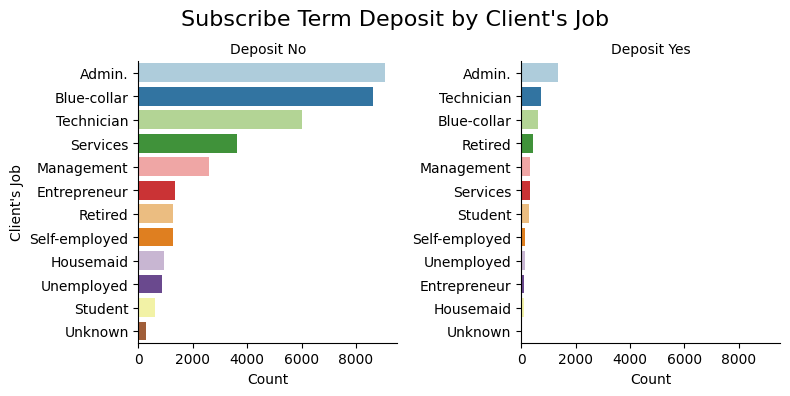

In [841]:
# visualize data deposit by client's job
viz = sns.FacetGrid(job_analysis, col='Deposit', col_wrap=2, height=4, sharey=False)
viz.map_dataframe(sns.barplot, x='Count', y='Job', palette='Paired', errorbar=None)
viz.set_axis_labels('Count', "Client's Job")
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Job", fontsize=16)
plt.show()

Most of clients work as admins, blue-collar workers, and technicians so it's also have highest proportion in both subscribe and not subscribe term deposit. Additionally, retired clients and students have high interest in term deposit.

### Feature Marital

In [842]:
# calculate data per client's marital status
marital = df['Marital'].value_counts()

# calculate data proportion
proportion = (marital.values*100/df.shape[0]).round(2)

# calculate percentage per client's marital status resulted in subscribe and not subscribe term deposit
marital_no = ((df[df['Deposit']=='No']['Marital'].value_counts())*100/marital).reindex(marital.index).round(2)
marital_yes = ((df[df['Deposit']=='Yes']['Marital'].value_counts())*100/marital).reindex(marital.index).round(2)

In [843]:
marital_df = pd.DataFrame({
    'Status':marital.index,
    'Count':marital.values,
    '% Proportion':proportion,
    '% Deposit No':marital_no,
    '% Deposit Yes':marital_yes
}).reset_index(drop=True)
marital_df

,Status,Count,% Proportion,% Deposit No,% Deposit Yes
0,Married,24921,60.52,89.84,10.16
1,Single,11564,28.08,85.99,14.01
2,Divorced,4611,11.20,89.68,10.32
3,Unknown,80,0.19,85.00,15.00


In [844]:
# groupby data by 'Marital' and 'Deposit'
marital_analysis = df.groupby(by=['Marital','Deposit']).agg({'Age':'count'}).rename(columns={'Age':'total'}).sort_values(by='total',ascending=False).reset_index()

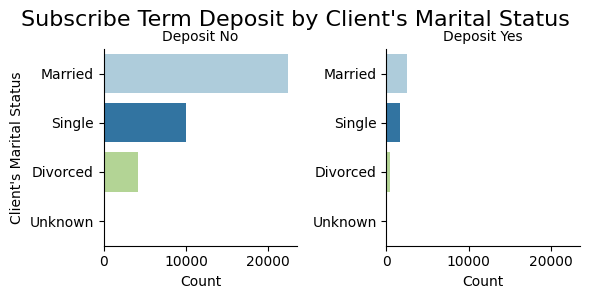

In [845]:
# visualize data deposit by client's marital status
viz = sns.FacetGrid(marital_analysis, col='Deposit', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='Marital', palette='Paired', errorbar=None)
viz.set_axis_labels('Count', "Client's Marital Status")
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Marital Status", fontsize=16)
plt.show()

Majority of client's marital statuses are married and it's also have highest proportion in both subscribe and not subscribe term deposit followed by single status and divorced.

### Feature Education

In [848]:
# calculate data per client's education
education = df['Education'].value_counts()

# calculate data proportion
proportion = (education.values*100/df.shape[0]).round(2)

# calculate percentage per client's education resulted in subscribe and not subscribe term deposit
edu_no = ((df[df['Deposit']=='No']['Education'].value_counts())*100/education).reindex(education.index).round(2)
edu_yes = ((df[df['Deposit']=='Yes']['Education'].value_counts())*100/education).reindex(education.index).round(2)

In [850]:
edu_df = pd.DataFrame({
    'Education':education.index,
    'Count':education.values,
    '% Proportion':proportion,
    '% Deposit No':edu_no,
    '% Deposit Yes':edu_yes
}).reset_index(drop=True)
edu_df

,Education,Count,% Proportion,% Deposit No,% Deposit Yes
0,University.degree,12164,29.54,86.28,13.72
1,High.school,9512,23.10,89.16,10.84
2,Basic.9y,6045,14.68,92.18,7.82
3,Professional.course,5240,12.73,88.65,11.35
4,Basic.4y,4176,10.14,89.75,10.25
5,Basic.6y,2291,5.56,91.79,8.21
6,Unknown,1730,4.20,85.49,14.51
7,Illiterate,18,0.04,77.78,22.22


In [851]:
# groupby data by 'Education' and 'Deposit'
education_analysis = df.groupby(by=['Education','Deposit']).agg({'Age':'count'}).rename(columns={'Age':'total'}).sort_values(by='total',ascending=False).reset_index()

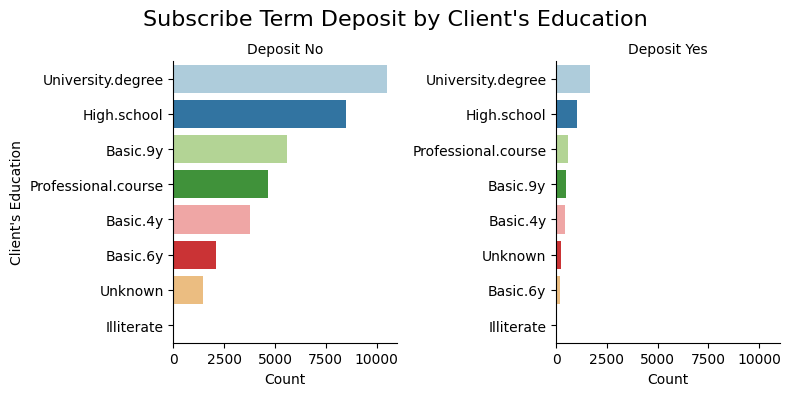

In [852]:
# visualize data deposit by client's education
viz = sns.FacetGrid(education_analysis, col='Deposit', col_wrap=2, height=4, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='Education', palette='Paired', errorbar=None)
viz.set_axis_labels('Count', "Client's Education")
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Education", fontsize=16)
plt.show()

We can see majority of client's education are university degree, high school, basic 9y, and professional course, it's also have highest proportion in both subscribe and not subscribe term deposit.

Based on this [article](https://en.wikipedia.org/wiki/Education_in_Portugal#Secondary_education), all the category is valid and unique, for next process we can **consider to group category Basic.9y, Basic.4y, and Basic.6y as Basic Education**.

### Feature Credit Default

In [853]:
# calculate data per client's credit default
default = df['Credit_Default'].value_counts()

# calculate data proportion
proportion = (default.values*100/df.shape[0]).round(2)

# calculate percentage per client's credit default resulted in subscribe and not subscribe term deposit
default_no = ((df[df['Deposit']=='No']['Credit_Default'].value_counts())*100/default).reindex(default.index).round(2)
default_yes = ((df[df['Deposit']=='Yes']['Credit_Default'].value_counts())*100/default).reindex(default.index).round(2)

In [854]:
default_df = pd.DataFrame({
    'Credit Default':default.index,
    'Count':default.values,
    '% Proportion':proportion,
    '% Deposit No':default_no,
    '% Deposit Yes':default_yes
}).reset_index(drop=True)
default_df

,Credit Default,Count,% Proportion,% Deposit No,% Deposit Yes
0,No,32577,79.12,87.12,12.88
1,Unknown,8596,20.88,94.85,5.15
2,Yes,3,0.01,100.00,NaN


In [855]:
# groupby data by 'Credit_Default' and 'Deposit'
default_analysis = df.groupby(by=['Credit_Default','Deposit']).agg({'Age':'count'}).rename(columns={'Age':'total'}).sort_values(by='total',ascending=False).reset_index()

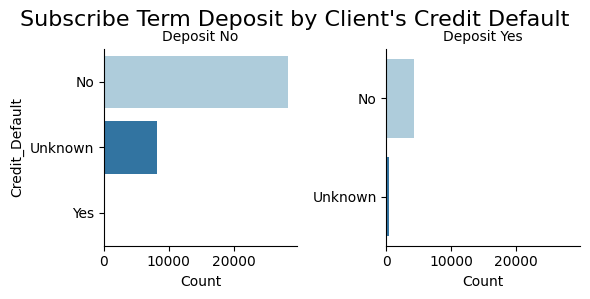

In [856]:
# visualize data deposit by client's credit default
viz = sns.FacetGrid(default_analysis, col='Deposit', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='Credit_Default', palette='Paired', errorbar=None)
viz.set_axis_labels('Count', 'Credit_Default')
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Credit Default", fontsize=16)
plt.show()

This feature represent client's credit status, default or not. Default is the failure to make required payments on a credit ([source](https://www.investopedia.com/terms/d/default2.asp)).

Majority of clients have no credit defaults and it's also have highest proportion in both subscribe and not subscribe term deposit. Data proportion for Credit_Default = 'yes' is far smaller than 2 other category and 'Unknown' value have quite big proportion. This can be an issue for interpretation process.

### Feature Housing Loan

In [859]:
# calculate data per client's housing loan
housing = df['Housing_Loan'].value_counts()

# calculate data proportion
proportion = (housing.values*100/df.shape[0]).round(2)

# calculate percentage per client's housing loan resulted in subscribe and not subscribe term deposit
housing_no = ((df[df['Deposit']=='No']['Housing_Loan'].value_counts())*100/housing).reindex(housing.index).round(2)
housing_yes = ((df[df['Deposit']=='Yes']['Housing_Loan'].value_counts())*100/housing).reindex(housing.index).round(2)

In [860]:
housing_df = pd.DataFrame({
    'Housing Loan':housing.index,
    'Count':housing.values,
    '% Proportion':proportion,
    '% Deposit No':housing_no,
    '% Deposit Yes':housing_yes
}).reset_index(drop=True)
housing_df

,Housing Loan,Count,% Proportion,% Deposit No,% Deposit Yes
0,Yes,21571,52.39,88.38,11.62
1,No,18615,45.21,89.12,10.88
2,Unknown,990,2.40,89.19,10.81


In [861]:
# groupby data by 'Housing_Loan' and 'Deposit'
housing_analysis = df.groupby(by=['Housing_Loan','Deposit']).agg({'Age':'count'}).rename(columns={'Age':'total'}).sort_values(by='total',ascending=False).reset_index()

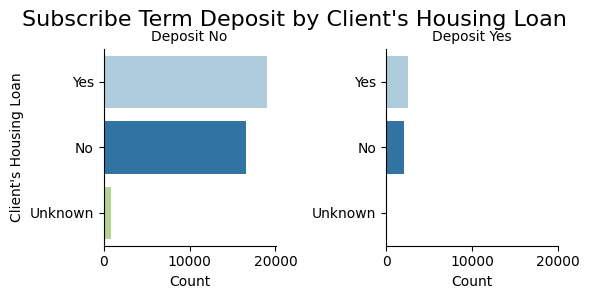

In [862]:
# visualize data deposit by housing loan
viz = sns.FacetGrid(housing_analysis, col='Deposit', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='Housing_Loan', palette='Paired', errorbar=None)
viz.set_axis_labels('Count', "Client's Housing Loan")
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Housing Loan", fontsize=16)
plt.show()

Majority of client have housing loan and it's also have highest proportion in both subscribe and not subscribe term deposit.

### Feature Personal Loan

In [865]:
# calculate data per client's personal loan
loan = df['Personal_Loan'].value_counts()

# calculate data proportion
proportion = (loan.values*100/df.shape[0]).round(2)

# calculate percentage per client's personal loan resulted in subscribe and not subscribe term deposit
loan_no = ((df[df['Deposit']=='No']['Personal_Loan'].value_counts())*100/loan).reindex(loan.index).round(2)
loan_yes = ((df[df['Deposit']=='Yes']['Personal_Loan'].value_counts())*100/loan).reindex(loan.index).round(2)

In [866]:
loan_df = pd.DataFrame({
    'Personal Loan':loan.index,
    'Count':loan.values,
    '% Proportion':proportion,
    '% Deposit No':loan_no,
    '% Deposit Yes':loan_yes
}).reset_index(drop=True)
loan_df

,Personal Loan,Count,% Proportion,% Deposit No,% Deposit Yes
0,No,33938,82.42,88.66,11.34
1,Yes,6248,15.17,89.07,10.93
2,Unknown,990,2.40,89.19,10.81


In [867]:
# groupby data by 'loan' and 'Deposit'
loan_analysis = df.groupby(by=['Personal_Loan','Deposit']).agg({'Age':'count'}).rename(columns={'Age':'total'}).sort_values(by='total',ascending=False).reset_index()

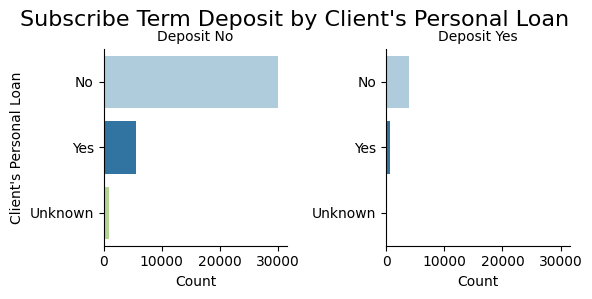

In [868]:
# visualize data deposit by personal loan
viz = sns.FacetGrid(loan_analysis, col='Deposit', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='Personal_Loan', palette='Paired', errorbar=None)
viz.set_axis_labels('Count', "Client's Personal Loan")
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Personal Loan", fontsize=16)
plt.show()

Majority of clients have no personal loan and it's also have highest proportion in both subscribe and not subscribe term deposit.

### Feature Contact Type

In [871]:
# calculate data by contact type
contact = df['Contact_Type'].value_counts()

# calculate data proportion
proportion = (contact.values*100/df.shape[0]).round(2)

# calculate percentage by contact type resulted in subscribe and not subscribe term deposit
contact_no = ((df[df['Deposit']=='No']['Contact_Type'].value_counts())*100/contact).reindex(contact.index).round(2)
contact_yes = ((df[df['Deposit']=='Yes']['Contact_Type'].value_counts())*100/contact).reindex(contact.index).round(2)

In [872]:
contact_df = pd.DataFrame({
    'Contact Type':contact.index,
    'Count':contact.values,
    '% Proportion':proportion,
    '% Deposit No':contact_no,
    '% Deposit Yes':contact_yes
}).reset_index(drop=True)
contact_df

,Contact Type,Count,% Proportion,% Deposit No,% Deposit Yes
0,Cellular,26135,63.47,85.26,14.74
1,Telephone,15041,36.53,94.77,5.23


In [873]:
# groupby data by 'Contact_Type' and 'Deposit'
contact_analysis = df.groupby(by=['Contact_Type','Deposit']).agg({'Age':'count'}).rename(columns={'Age':'total'}).sort_values(by='total',ascending=False).reset_index()

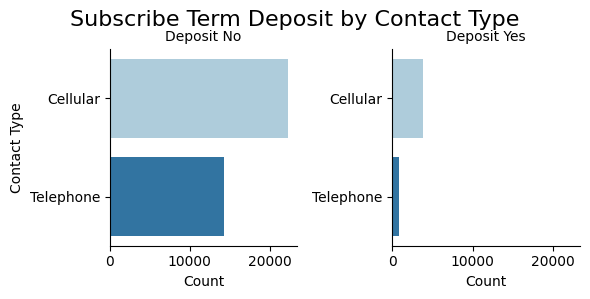

In [874]:
# visualize data deposit by contact communication type
viz = sns.FacetGrid(contact_analysis, col='Deposit', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='Contact_Type', palette='Paired', errorbar=None)
viz.set_axis_labels('Count', 'Contact Type')
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle('Subscribe Term Deposit by Contact Type', fontsize=16)
plt.show()

Contact type cellular refers to contact communication via mobile phones and contact type telephone refers to communication via landline phones.
Majority of clients are contacted by cellular and it's also have highest proportion in both subscribe and not subscribe term deposit. Client contacted by cellular have higher percentage to subscribe term deposit.

### Feature Last Contact Month

In [877]:
# calculate data by last contact month
month = df['LastContact_Month'].value_counts()

# calculate data proportion
proportion = (month.values*100/df.shape[0]).round(2)

# calculate percentage by last contact month resulted in subscribe and not subscribe term deposit
month_no = ((df[df['Deposit']=='No']['LastContact_Month'].value_counts())*100/month).reindex(month.index).round(2)
month_yes = ((df[df['Deposit']=='Yes']['LastContact_Month'].value_counts())*100/month).reindex(month.index).round(2)

In [878]:
month_df = pd.DataFrame({
    'Last Contact Month':month.index,
    'Count':month.values,
    '% Proportion':proportion,
    '% Deposit No':month_no,
    '% Deposit Yes':month_yes
}).reset_index(drop=True)
month_df

,Last Contact Month,Count,% Proportion,% Deposit No,% Deposit Yes
0,May,13767,33.43,93.56,6.44
1,Jul,7169,17.41,90.96,9.04
2,Aug,6176,15.00,89.39,10.61
3,Jun,5318,12.92,89.49,10.51
4,Nov,4100,9.96,89.85,10.15
5,Apr,2631,6.39,79.51,20.49
6,Oct,717,1.74,56.07,43.93
7,Sep,570,1.38,55.09,44.91
8,Mar,546,1.33,49.45,50.55
9,Dec,182,0.44,51.10,48.90


In [879]:
# month order
month_order = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['Order'] = df['LastContact_Month'].map(month_order)

# groupby data by 'LastContact_Month' and 'Deposit'
month_analysis = df.groupby(by=['LastContact_Month','Deposit']).agg({'Age':'count','Order':'mean'}).rename(columns={'Age':'total'}).sort_values(by=['Order','Deposit']).reset_index()
df = df.drop(columns='Order')

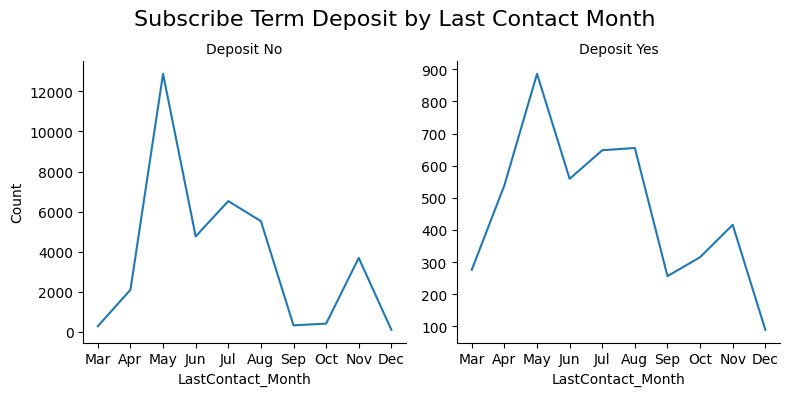

In [880]:
# visualize data deposit by last contact month
viz = sns.FacetGrid(month_analysis, col='Deposit', col_wrap=2, height=4, sharey=False)
viz.map_dataframe(sns.lineplot, x='LastContact_Month', y='total', palette='Paired', errorbar=None)
viz.set_axis_labels('LastContact_Month','Count')
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle('Subscribe Term Deposit by Last Contact Month', fontsize=16)
plt.show()

There are no clients who last contacted in January or February. 
Most of clients are contacted in May, July, and August but percentage of client who subscribe term deposit is higher when contacted in April, Oct, Sep, March, December. Client who last contacted in May have higher proportion in both subscribe and not subscribe term deposit.

### Feature Last Contact Day

In [883]:
# calculate data by last contact day
day = df['LastContact_Day'].value_counts()

# calculate data proportion
proportion = (day.values*100/df.shape[0]).round(2)

# calculate percentage by last contact day resulted in subscribe and not subscribe term deposit
day_no = ((df[df['Deposit']=='No']['LastContact_Day'].value_counts())*100/day).reindex(day.index).round(2)
day_yes = ((df[df['Deposit']=='Yes']['LastContact_Day'].value_counts())*100/day).reindex(day.index).round(2)

In [884]:
day_df = pd.DataFrame({
    'Contact Day':day.index,
    'Count':day.values,
    '% Proportion':proportion,
    '% Deposit No':day_no,
    '% Deposit Yes':day_yes
}).reset_index(drop=True)
day_df

,Contact Day,Count,% Proportion,% Deposit No,% Deposit Yes
0,Thu,8618,20.93,87.89,12.11
1,Mon,8512,20.67,90.05,9.95
2,Wed,8134,19.75,88.33,11.67
3,Tue,8086,19.64,88.21,11.79
4,Fri,7826,19.01,89.19,10.81


In [885]:
# day order
day_order = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5}

df['Order'] = df['LastContact_Day'].map(day_order)

# groupby data by 'LastContact_Day' and 'Deposit'
day_analysis = df.groupby(by=['LastContact_Day','Deposit']).agg({'Age':'count','Order':'mean'}).rename(columns={'Age':'total'}).sort_values(by=['Order','Deposit']).reset_index()
df = df.drop(columns='Order')

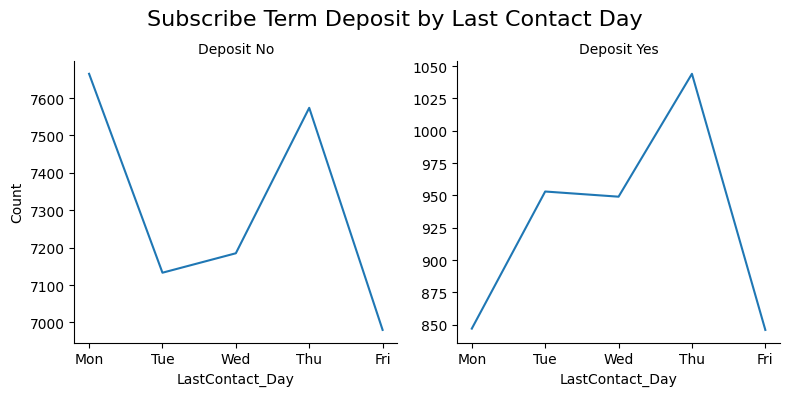

In [886]:
# visualize data deposit by last contact day of week
viz = sns.FacetGrid(day_analysis, col='Deposit', col_wrap=2, height=4, sharey=False)
viz.map_dataframe(sns.lineplot, x='LastContact_Day', y='total', palette='Paired', errorbar=None)
viz.set_axis_labels('LastContact_Day', 'Count')
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle('Subscribe Term Deposit by Last Contact Day', fontsize=16)
plt.show()

The number of clients last contacted in each day are similar with most of clients are last contacted in Thursday. Client who last contacted in Monday have slightly higher proportion to not subscribe term deposit.

### Feature Previous Outcome

In [889]:
# calculate data by previous outcome
pout = df['Prev_Outcome'].value_counts()

# calculate data proportion
proportion = (pout.values*100/df.shape[0]).round(2)

# calculate percentage by previous outcome resulted in subscribe and not subscribe term deposit
pout_no = ((df[df['Deposit']=='No']['Prev_Outcome'].value_counts())*100/pout).reindex(pout.index).round(2)
pout_yes = ((df[df['Deposit']=='Yes']['Prev_Outcome'].value_counts())*100/pout).reindex(pout.index).round(2)

In [890]:
pout_df = pd.DataFrame({
    'Previous Outcome':pout.index,
    'Count':pout.values,
    '% Proportion':proportion,
    '% Deposit No':pout_no,
    '% Deposit Yes':pout_yes
}).reset_index(drop=True)
pout_df

,Previous Outcome,Count,% Proportion,% Deposit No,% Deposit Yes
0,Nonexistent,35551,86.34,91.17,8.83
1,Failure,4252,10.33,85.77,14.23
2,Success,1373,3.33,34.89,65.11


In [891]:
# groupby data by 'Prev_Outcome' and 'Deposit'
poutcome_analysis = df.groupby(by=['Prev_Outcome','Deposit']).agg({'Age':'count'}).rename(columns={'Age':'total'}).sort_values(by='total',ascending=False).reset_index()

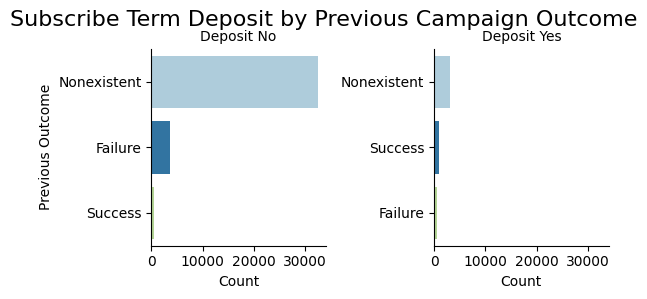

In [892]:
# visualize data deposit by previous campaign outcome
viz = sns.FacetGrid(poutcome_analysis, col='Deposit', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='Prev_Outcome', palette='Paired', errorbar=None)
viz.set_axis_labels('Count', 'Previous Outcome')
viz.set_titles(col_template='Deposit {col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle('Subscribe Term Deposit by Previous Campaign Outcome', fontsize=16)
plt.show()

Majority of clients have nonexistent outcome from previous campaign and it's also have highest proportion in both subscribe and not subscribe term deposit. Client with previous outcome success tend to have high interest to subscribe term deposit.

#### Notes :

- There are 'Unknown' value in feature `Job`, `Marital`, `Education`, `Credit_Default`, `Housing_Loan`, `Personal_Loan` and this will analyze further by checking the cardinality or replacing value using imputer.
- Consider to group Basic Education category in `Education` feature.

### **3.4 Numerical Features**

### Data Distribution and Outlier using Boxplot

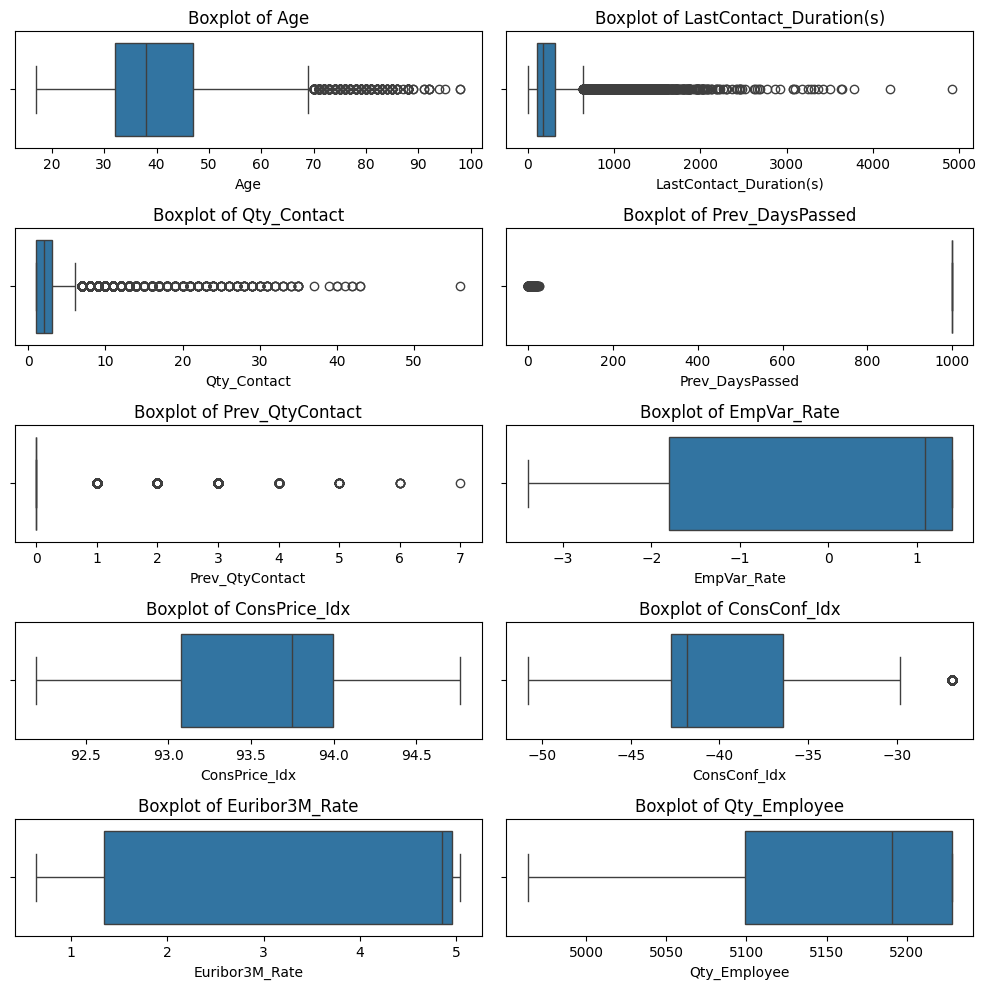

In [893]:
fig,axes = plt.subplots(5,2,figsize=(10,10))

for i, cols in enumerate(numerical_cols):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[cols], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {cols}')

plt.tight_layout()
plt.show()

### Data Distribution using Statistics Calculation

In [894]:
# define alpha value
alpha = 0.05
index = 1

dist_info = []
for col in numerical_cols:
    stat, p_value = normaltest(df[col].dropna())

    if p_value > alpha:
        distribution = 'Normally Distributed'
    else:
        distribution = 'Not Normally Distributed'
    
    skewness = df[col].skew()
    
    if skewness > 0:
        skewness_type = 'Right Skew'
    else:
        skewness_type = 'Left Skew'
    
    dist_info.append([col, p_value, distribution, skewness, skewness_type])

# make dataframe from the results
distribution_info = pd.DataFrame(dist_info, columns=['Feature',  
                                                     'P-value', 
                                                     'Distribution', 
                                                     'Skewness',
                                                     'Skewness Type'])
distribution_info

,Feature,P-value,Distribution,Skewness,Skewness Type
0,Age,0.000000e+00,Not Normally Distributed,0.784560,Right Skew
1,LastContact_Duration(s),0.000000e+00,Not Normally Distributed,3.262808,Right Skew
2,Qty_Contact,0.000000e+00,Not Normally Distributed,4.762044,Right Skew
3,Prev_DaysPassed,0.000000e+00,Not Normally Distributed,-4.921386,Left Skew
4,Prev_QtyContact,0.000000e+00,Not Normally Distributed,3.831396,Right Skew
5,EmpVar_Rate,0.000000e+00,Not Normally Distributed,-0.724061,Left Skew
6,ConsPrice_Idx,0.000000e+00,Not Normally Distributed,-0.230853,Left Skew
7,ConsConf_Idx,5.147000e-204,Not Normally Distributed,0.302876,Right Skew
8,Euribor3M_Rate,0.000000e+00,Not Normally Distributed,-0.709194,Left Skew
9,Qty_Employee,0.000000e+00,Not Normally Distributed,-1.044317,Left Skew


The boxplot diagram and statistics calculation indicates that the numerical data in the dataframe not normally distributed. Additionally, some columns have outliers, so we need to calculate the IQR (Interquartile Range) get the number of outliers.

### IQR (Interquartile Range)

In [895]:
# define function to calculate IQR and outlier
def IQR_outlier(data, col):
    Q1 = data[col].quantile(1/4)
    Q3 = data[col].quantile(3/4)
    IQR = Q3 - Q1
    outlier_lower = Q1 - 1.5 * IQR
    outlier_upper = Q3 + 1.5 * IQR
    total_outliers = len(data[(data[col] < outlier_lower) | (data[col] > outlier_upper)])
    outlier_percentage = round(total_outliers / len(data[col]) * 100, 2)
    return outlier_lower, outlier_upper, total_outliers, outlier_percentage

In [896]:
# define an empty list to store function result
outlier = []
for col in numerical_cols:
    lower_band, upper_band, total_outliers, outlier_percentage = IQR_outlier(df, col)
    outlier.append([col, lower_band, upper_band, total_outliers, outlier_percentage])

In [897]:
# turn the outlier list into a dataframe
outlier_info_df = pd.DataFrame(outlier, columns=["Columns", "Lower Band", "Upper Band", "Total Outliers", "Percentage of Outliers (%)"])
outlier_info_df

,Columns,Lower Band,Upper Band,Total Outliers,Percentage of Outliers (%)
0,Age,9.5000,69.5000,468,1.14
1,LastContact_Duration(s),-223.5000,644.5000,2963,7.20
2,Qty_Contact,-2.0000,6.0000,2406,5.84
3,Prev_DaysPassed,999.0000,999.0000,1515,3.68
4,Prev_QtyContact,0.0000,0.0000,5625,13.66
5,EmpVar_Rate,-6.6000,6.2000,0,0.00
6,ConsPrice_Idx,91.6965,95.3725,0,0.00
7,ConsConf_Idx,-52.1500,-26.9500,446,1.08
8,Euribor3M_Rate,-4.0815,10.3865,0,0.00
9,Qty_Employee,4905.6000,5421.6000,0,0.00


There are 5 numerical column that have outliers below 10% and 1 column with outlier over 10%. We will analyze further for this outliers.

### Feature Age

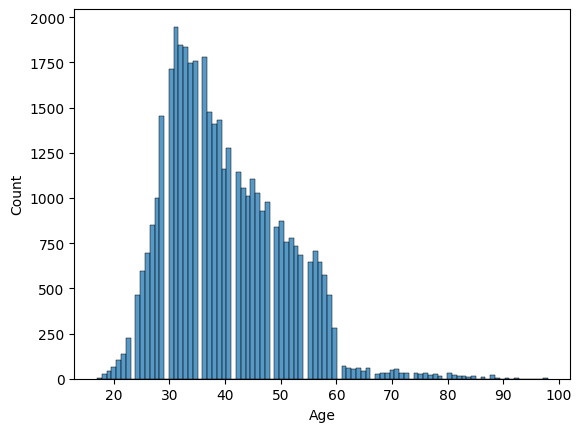

In [898]:
# data distribution
sns.histplot(data=df,x='Age')
plt.show()

In [899]:
# outlier data
display(df[df['Age']> 80].describe(), df[df['Age']> 80].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,84.974790,269.369748,1.957983,748.352941,0.722689,-2.183193,93.226630,-37.918487,0.958605,5028.194118
std,3.655648,200.694340,1.416578,433.541732,1.065041,0.837097,0.747809,7.798663,0.332061,47.997799
min,81.000000,48.000000,1.000000,2.000000,0.000000,-3.400000,92.201000,-50.000000,0.635000,4963.600000
25%,82.000000,134.000000,1.000000,505.500000,0.000000,-3.000000,92.649000,-46.200000,0.720000,4991.600000
50%,84.000000,203.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-37.500000,0.843000,5017.500000
75%,88.000000,325.000000,2.000000,999.000000,1.000000,-1.700000,94.041000,-31.400000,1.008000,5076.200000
max,98.000000,1064.000000,7.000000,999.000000,4.000000,-1.100000,94.601000,-26.900000,1.663000,5099.100000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,119,119,119,119,119,119,119,119,119,119,119
unique,3,3,7,2,3,3,2,10,5,3,2
top,Retired,Married,Basic.4y,No,Yes,No,Cellular,Sep,Tue,Nonexistent,No
freq,105,60,73,95,72,99,112,20,33,71,60


This data become outlier because majority of client's age are between 30-40 years old, but based on this [article](https://www-worldometers-info.translate.goog/demographics/portugal-demographics/?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc), Portugal's life expectancy in 2008 to 2010 was around 80 years old so we will use this data as new upper band and **we will delete data client with age above 80**.

### Feature Last Contact Duration(s)

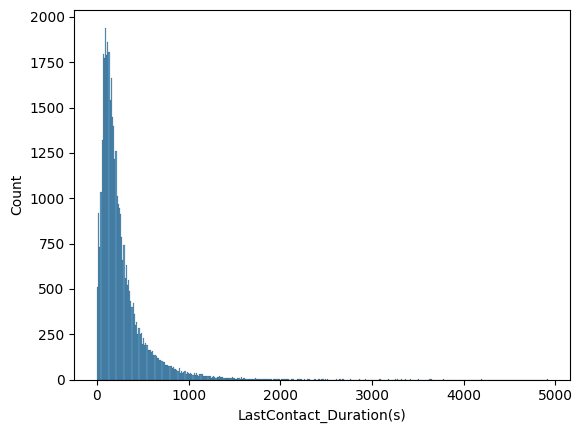

In [900]:
# data distribution
sns.histplot(data=df,x='LastContact_Duration(s)')
plt.show()

In [901]:
# outlier data
display(df[df['LastContact_Duration(s)']> 644.5].describe(),df[df['LastContact_Duration(s)']> 644.5].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,39.695579,968.217010,2.466757,951.430307,0.170098,0.082889,93.593624,-40.785251,3.602532,5165.822106
std,10.364156,367.294817,2.186562,212.062901,0.499923,1.560541,0.566724,4.567917,1.744140,74.418556
min,17.000000,645.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.636000,4963.600000
25%,32.000000,729.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,854.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-42.000000,4.857000,5191.000000
75%,47.000000,1086.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,92.000000,4918.000000,26.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963
unique,12,4,8,2,3,3,2,10,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Nonexistent,Yes
freq,714,1777,871,2356,1537,2432,1982,951,681,2581,1526


This data showed that around half of the contact made with duration over 644.5 seconds resulted in client subscribed term deposit. We also see the most of data have nonexistent previous outcome, it means in previous campaign the client choose to not subscribe but in this campaign they subscribe term deposit. 

We can use this data as the factor to consider when designing recommendations or regulations for the stakeholders. Thus **we will retain this data**.

### Feature Contact Quantity 

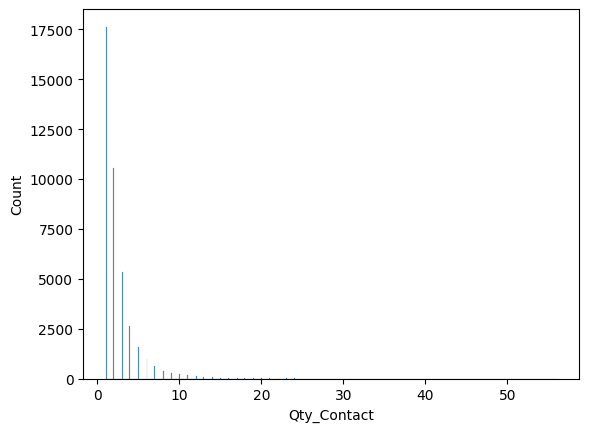

In [902]:
# data distribution
sns.histplot(data=df, x='Qty_Contact')
plt.show()

In [903]:
# outlier data
display(df[df['Qty_Contact']> 6].describe(),df[df['Qty_Contact']> 6].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,40.150042,190.559435,11.004156,991.987116,0.051122,0.818953,93.789961,-40.561347,4.358310,5199.896592
std,9.977247,247.655151,5.417610,83.152068,0.263285,1.168708,0.498564,3.682855,1.319473,51.200487
min,20.000000,0.000000,7.000000,1.000000,0.000000,-3.400000,92.201000,-50.000000,0.644000,4963.600000
25%,32.000000,31.000000,7.000000,999.000000,0.000000,1.100000,93.444000,-42.700000,4.857000,5191.000000
50%,38.000000,103.000000,9.000000,999.000000,0.000000,1.400000,93.918000,-41.800000,4.959000,5228.100000
75%,47.000000,237.000000,12.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,88.000000,2692.000000,56.000000,999.000000,5.000000,1.400000,94.601000,-29.800000,4.968000,5228.100000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406
unique,12,4,8,2,3,3,2,10,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,Jul,Thu,Nonexistent,No
freq,632,1465,744,1801,1223,1976,1245,680,560,2301,2295


This outlier data showed that there are as many as 56 contacts made to one client and it resulted most of client decided not subscribing term deposit. We can use this data as consideration for making recommendations or regulations for stakeholder.

For this outlier data we need to **check futher whether to delete or retain the data**.

### Feature Previous Days Passed

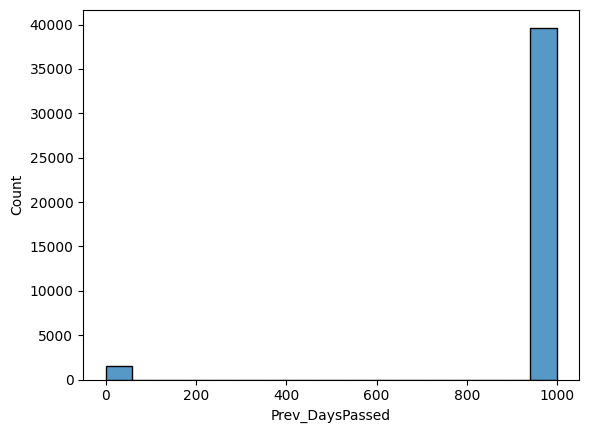

In [904]:
# data distribution
sns.histplot(data=df, x='Prev_DaysPassed')
plt.show()

In [905]:
# outlier data
display(df[df['Prev_DaysPassed']< 999].describe(),df[df['Prev_DaysPassed']< 999].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000
mean,41.852805,321.485809,1.822442,6.014521,1.660726,-2.096238,93.342507,-38.341386,0.985949,5029.244686
std,15.296112,254.676128,1.241414,3.824906,0.934306,0.833032,0.783216,6.628399,0.533622,52.308986
min,17.000000,1.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,30.000000,165.000000,1.000000,3.000000,1.000000,-2.900000,92.649000,-42.000000,0.718000,4991.600000
50%,37.000000,253.000000,1.000000,6.000000,1.000000,-1.800000,93.200000,-38.300000,0.879000,5017.500000
75%,52.000000,392.000000,2.000000,7.000000,2.000000,-1.700000,94.055000,-31.400000,1.044000,5076.200000
max,98.000000,3509.000000,13.000000,27.000000,7.000000,-0.100000,94.767000,-26.900000,4.286000,5195.800000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
unique,12,4,8,2,3,3,2,10,5,2,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Success,Yes
freq,469,797,578,1451,835,1251,1402,248,343,1373,967


According to outlier data table, both lower and upper band in `Prev_DaysPassed` column are 999 that means majority of client was not previously contacted for previous campaign. So we need to **retain this data** because the lower and upper band can considered not valid for this column and we need the client data that have previously contacted.

### Feature Previous Contact Quantity

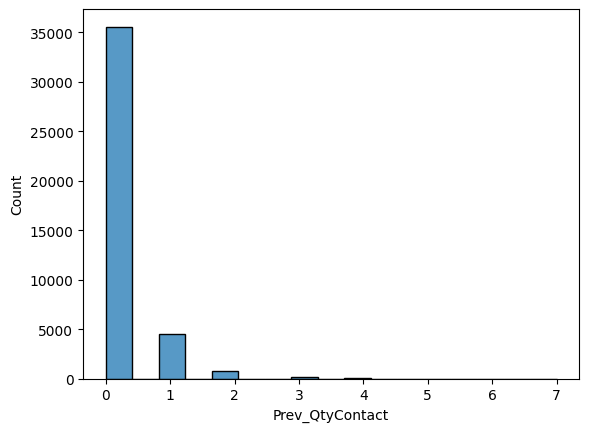

In [906]:
# data distribution
sns.histplot(data=df, x='Prev_QtyContact')
plt.show()

In [907]:
# outlier data
display(df[df['Prev_QtyContact']> 0].describe(),df[df['Prev_QtyContact']> 0].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,40.453156,265.889600,1.957156,731.555911,1.266489,-1.784498,93.132829,-41.663093,1.491313,5077.464053
std,12.629950,239.481083,1.445715,440.545340,0.639158,0.876830,0.575604,6.170110,1.048513,64.658635
min,17.000000,1.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,115.000000,1.000000,13.000000,1.000000,-1.800000,92.893000,-46.200000,0.878000,5017.500000
50%,37.000000,199.000000,1.000000,999.000000,1.000000,-1.800000,92.893000,-42.000000,1.266000,5099.100000
75%,48.000000,328.000000,2.000000,999.000000,1.000000,-1.700000,93.200000,-38.300000,1.365000,5099.100000
max,98.000000,3509.000000,16.000000,999.000000,7.000000,-0.100000,94.767000,-26.900000,4.968000,5195.800000


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625
unique,12,4,8,3,3,3,2,10,5,2,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,May,Thu,Failure,No
freq,1519,3107,1775,5049,3120,4634,5222,2009,1181,4252,4126


According to outlier data table, both lower and upper band in `previous` column are 0 that means majority of client was not previously contacted for previous campaign. So we need to retain this data because the lower and upper band can considered not valid for this column and we need the client data that have previously contacted. But we also need **check further for this data** compared to `pdays` column because there is possibility of invalid data.

### Feature Employment Variation Rate

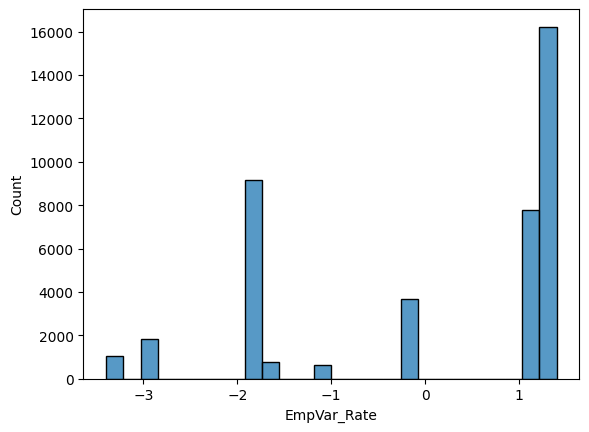

In [908]:
# data distribution
sns.histplot(data=df, x='EmpVar_Rate')
plt.show()

The employment variation rate, similar to employee turnover rate ([source](https://www.aihr.com/blog/how-to-calculate-employee-turnover-rate/)), measures the rate at which the number of employees is changing over a quarterly period, so it is possible to have negative value and range around -3% to 1%. Negative value can indicates a decrease in number of employee and positive value indicates increase in employment.

### Feature Consumer Price Index

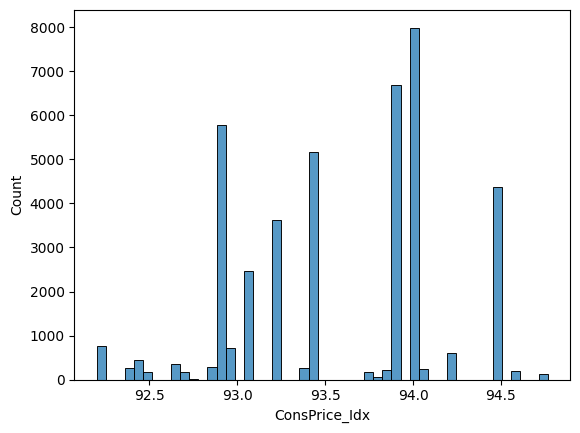

In [909]:
# data distribution
sns.histplot(data=df, x='ConsPrice_Idx')
plt.show()

This feature measures the average changes in prices paid by consumers for goods and services over a monthly period ([source](https://www.investopedia.com/terms/c/consumerpriceindex.asp)). The data range around 91 to 95 (below 100) which mean there is a general decline in the price level of goods and services and the economy condition is slightly deflationary. 

### Feature Consumer Confidence Index

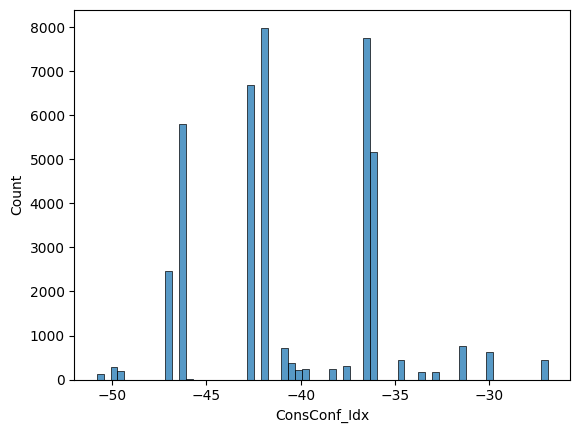

In [910]:
# data distribution
sns.histplot(data=df, x='ConsConf_Idx')
plt.show()

In [911]:
# outlier data
display(df[df['ConsConf_Idx']> -26.95].describe(),df[df['ConsConf_Idx']> -26.95].describe(include='object'))

,Age,LastContact_Duration(s),Qty_Contact,Prev_DaysPassed,Prev_QtyContact,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee
count,446.00000,446.000000,446.000000,446.000000,446.000000,4.460000e+02,4.460000e+02,4.460000e+02,446.000000,446.0
mean,45.61435,280.165919,1.522422,831.869955,0.504484,-3.400000e+00,9.243100e+01,-2.690000e+01,0.735482,5017.5
std,17.11768,270.054375,0.836359,372.133691,0.718130,8.891758e-16,2.845363e-14,3.556703e-15,0.008819,0.0
min,17.00000,49.000000,1.000000,2.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.720000,5017.5
25%,32.00000,122.250000,1.000000,999.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.728000,5017.5
50%,40.00000,189.000000,1.000000,999.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.739000,5017.5
75%,59.00000,327.750000,2.000000,999.000000,1.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.741000,5017.5
max,98.00000,2187.000000,6.000000,999.000000,3.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.754000,5017.5


,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,Prev_Outcome,Deposit
count,446,446,446,446,446,446,446,446,446,446,446
unique,12,4,7,2,3,3,2,1,5,3,2
top,Admin.,Married,University.degree,No,Yes,No,Cellular,Oct,Thu,Nonexistent,No
freq,121,266,158,433,235,380,390,446,116,273,266


This column represent the Consumer Confidence Index (CCI) or the degree of optimism or pessimism consumers feel about their financial situation and the economy. Usually this index are benchmarked at 100 ([source](https://corporatefinanceinstitute.com/resources/economics/consumer-confidence-index-cci/)) but in this dataset, all CCI data have negative value.

Because we can't know CCI are calculate in this dataset, **we will delete this column**.

<!-- We can assume this dataset are using 0 as the base value to conclude that majority of clients feel pessimism about the financial and economy situation (negative index). This pessimism suggests potential economic difficulties. -->

<!-- According to this [article](https://tradingeconomics.com/portugal/consumer-confidence), the range of CCI from May 2008 to Nov 2010, supposed to be between -33.2 to -13.6. Because this is an actual data, we will use this as new upper and lower band. In the next process we will **delete outlier data or exclude this column for this project**. -->

### Feature Euribor 3 Month Rate

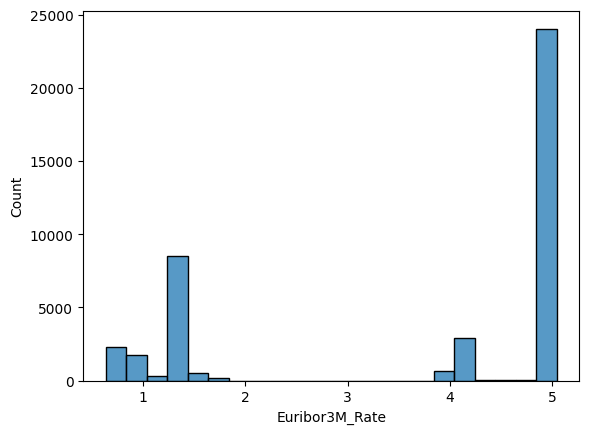

In [912]:
# data distribution
sns.histplot(data=df, x='Euribor3M_Rate')
plt.show()

The Euribor, Euro Interbank Offered Rate, is the average interest rate at which banks in the Eurozone are willing to lend money to each other ([source](https://www.euribor-rates.eu/en/)). Euribor with maturity of 3-month period are used in dataset and based on this [article](https://www.euribor-rates.eu/en/current-euribor-rates/2/euribor-rate-3-months/), all data in this column are valid and can be use in this project.

### Feature Qty Employees

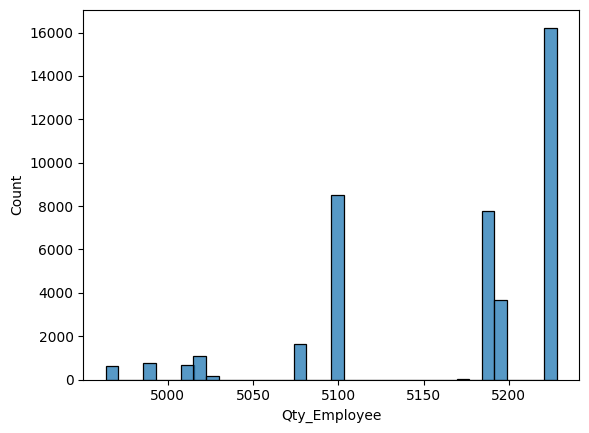

In [913]:
# data distribution
sns.histplot(data=df, x='Qty_Employee')
plt.show()

In [914]:
outlier_info_df

,Columns,Lower Band,Upper Band,Total Outliers,Percentage of Outliers (%)
0,Age,9.5000,69.5000,468,1.14
1,LastContact_Duration(s),-223.5000,644.5000,2963,7.20
2,Qty_Contact,-2.0000,6.0000,2406,5.84
3,Prev_DaysPassed,999.0000,999.0000,1515,3.68
4,Prev_QtyContact,0.0000,0.0000,5625,13.66
5,EmpVar_Rate,-6.6000,6.2000,0,0.00
6,ConsPrice_Idx,91.6965,95.3725,0,0.00
7,ConsConf_Idx,-52.1500,-26.9500,446,1.08
8,Euribor3M_Rate,-4.0815,10.3865,0,0.00
9,Qty_Employee,4905.6000,5421.6000,0,0.00


This feature measures the quantity of employees in quartal period and it is range around 5000 to 5200 (quite stable). Quantity of employee will be heavily related to Employment Variation Rate (support by correlation test result). Because the Employment Variation Rate is calculate by using difference of current and previous data, it contains more value than Qty Employee data, so **we will delete this column**.

### **3.5 Check Data `Prev_DaysPassed` = 999**

From previous analysis, we found majority of client have `Prev_DaysPassed` equal to 999 which mean they were not previously contacted. When the client never contacted before, the `Prev_QtyContact` must be 0 and `Prev_Outcome` must be Nonexistent.

In [915]:
df_check = df[df['Prev_DaysPassed']==999]
df_check

,Age,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,...,Qty_Contact,Prev_DaysPassed,Prev_QtyContact,Prev_Outcome,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee,Deposit
0,56,Housemaid,Married,Basic.4y,No,No,No,Telephone,May,Mon,...,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
1,57,Services,Married,High.school,Unknown,No,No,Telephone,May,Mon,...,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
2,37,Services,Married,High.school,No,Yes,No,Telephone,May,Mon,...,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
3,40,Admin.,Married,Basic.6y,No,No,No,Telephone,May,Mon,...,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
4,56,Services,Married,High.school,No,No,Yes,Telephone,May,Mon,...,1,999,0,Nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,Retired,Married,Professional.course,No,Yes,No,Cellular,Nov,Fri,...,1,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,Yes
41184,46,Blue-collar,Married,Professional.course,No,No,No,Cellular,Nov,Fri,...,1,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,No
41185,56,Retired,Married,University.degree,No,Yes,No,Cellular,Nov,Fri,...,2,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,No
41186,44,Technician,Married,Professional.course,No,No,No,Cellular,Nov,Fri,...,1,999,0,Nonexistent,-1.1,94.767,-50.8,1.028,4963.6,Yes


In [916]:
df_check[(df_check['Prev_QtyContact']!=0) & (df_check['Prev_Outcome']!='Nonexistent')]

,Age,Job,Marital,Education,Credit_Default,Housing_Loan,Personal_Loan,Contact_Type,LastContact_Month,LastContact_Day,...,Qty_Contact,Prev_DaysPassed,Prev_QtyContact,Prev_Outcome,EmpVar_Rate,ConsPrice_Idx,ConsConf_Idx,Euribor3M_Rate,Qty_Employee,Deposit
24013,38,Blue-collar,Single,Unknown,No,Yes,No,Telephone,Oct,Tue,...,1,999,1,Failure,-0.1,93.798,-40.4,4.968,5195.8,No
24019,40,Services,Married,High.school,No,Yes,No,Telephone,Oct,Tue,...,1,999,1,Failure,-0.1,93.798,-40.4,4.968,5195.8,Yes
24076,36,Admin.,Married,University.degree,No,Yes,No,Telephone,Nov,Wed,...,1,999,1,Failure,-0.1,93.200,-42.0,4.663,5195.8,No
24102,36,Admin.,Married,High.school,No,Yes,No,Telephone,Nov,Wed,...,1,999,1,Failure,-0.1,93.200,-42.0,4.286,5195.8,Yes
24113,29,Self-employed,Married,University.degree,No,Yes,No,Telephone,Nov,Thu,...,1,999,1,Failure,-0.1,93.200,-42.0,4.245,5195.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,Admin.,Married,University.degree,No,No,No,Telephone,Nov,Wed,...,1,999,1,Failure,-1.1,94.767,-50.8,1.030,4963.6,Yes
41170,40,Management,Divorced,University.degree,No,Yes,No,Cellular,Nov,Wed,...,2,999,4,Failure,-1.1,94.767,-50.8,1.030,4963.6,No
41173,62,Retired,Married,University.degree,No,Yes,No,Cellular,Nov,Thu,...,1,999,2,Failure,-1.1,94.767,-50.8,1.031,4963.6,Yes
41175,34,Student,Single,Unknown,No,Yes,No,Cellular,Nov,Thu,...,1,999,2,Failure,-1.1,94.767,-50.8,1.031,4963.6,No


There are 4.110 data with `Prev_DaysPassed` = 999 but the `Prev_QtyContact` is not 0 and have `Prev_Outcome` other than 'Nonexistent'.
Because the data in this feature not accurately represent other data, **we will delete `Prev_DaysPassed` column.**

#### Notes for next process :
- `Age` : delete data with age over 80 years old.
- `LastContact_Duration(s)` : retain all data.
- `Qty_Contact` : check further
- `Prev_DaysPassed` : delete column
- `Prev_QtyContact` : check further
- `ConsConf_Idx` : delete column
- `Qty_Employee` : delete column